In [1]:
import requests
import json
import execjs
import os
from PIL import Image
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [13]:
get_yzm_url = 'https://cap.dingxiang-inc.com/api/a?w=300&h=150&s=50&ak=e0a73ec57a9f469dcce9b3b5da97648b&c=5fec4785XaYM7X4g2WLXrK761Nx15VNm6M563Eq1&jsv=1.4.5.1&aid=dx-1609923598391-43833125-1&wp=1&de=0&uid=&lf=0&tpc=&t=EA640969210A5346AFB82BA563C16FE8DBFEFB5F053539636AC6ED8CAD43DB198E85EE4C5D761AF3409633F4592D0C541878F2D8AF3480C0CA76A57E5276A6CA3061250D2A39731868BEF47CB3C7694F'
response = requests.get(get_yzm_url)
json_data = json.loads(response.text)
# p1：有缺口的背景图  p2：缺口图  p3；无缺口原图
p1_url = 'https://static.dingxiang-inc.com/picture' + json_data['p1']
p3_url = 'https://static.dingxiang-inc.com/picture' + json_data['p3']

In [3]:
def huanyuan(i):
    js = execjs.compile('''
    function r(r) {
          for (var t = [
          ], e = 0; e < r.length; e++) {
            var i = r.charCodeAt(e);
            if (32 === e) break;
            for (; n(t, i % 32); ) i++;
            t.push(i % 32)
          }
          return t
        }
    function n(r, t) {
          if (r[(n = 'sedulcni', n.split('').reverse().join(''))]) return r.includes(t);
          for (var n, e = 0, i = r.length; e < i; e++) if (r[e] === t) return !0;
          return !1
        }
        ''')
    r = js.call('r', i)
    return r

In [4]:
huanyuan_list = huanyuan(json_data['p1'].split('/')[-1].split('.')[0])

In [6]:
response = requests.get(p1_url)
que_img = './dx_img/' + json_data['p1'].split('/')[-1].split('.')[0] + '.jpg'
with open(que_img, 'wb') as f:
    f.write(response.content)

In [8]:
img = Image.open(que_img)
for i in range(32):
    a = 12 * i  # 图片距离左边的大小
    b = 0  # 图片距离上边的大小
    c = 12 * (i + 1)  # 图片距离左边的大小 + 图片自身宽度
    d = 200  # 图片距离上边的大小 + 图片自身高度
    croping = img.crop((a, b, c, d))
    croping.save('./dx_img/ge' + str(i) + '.jpg')

croping = img.crop((384, 0, 400, 200))
croping.save('./dx_img/ge32.jpg')

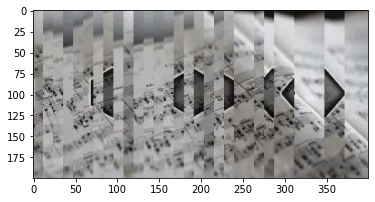

In [12]:
target = Image.new('RGB', (400, 200))  # 拼接前需要写拼接完成后的图片大小 1200*600
a = 0
c = 0
for i in huanyuan_list:
    pj_img = Image.open('./dx_img/ge'+str(i)+'.jpg')
    a = c  # 图片距离左边的大小
    b = 0  # 图片距离上边的大小
    c = a + 12  # 图片距离左边的大小 + 图片自身宽度
    d = 200  # 图片距离上边的大小 + 图片自身高度
    target.paste(pj_img, (a, b, c, d))
last_img = Image.open('./dx_img/ge32.jpg')
# plt.imshow(last_img)
target.paste(last_img, (384, 0, 400, 200))
# print('拼接图片的路径为：wanzheng.jpg')
target.save('./dx_img/wanzheng.jpg')
wanzheng = Image.open('./dx_img/wanzheng.jpg')
plt.imshow(wanzheng)

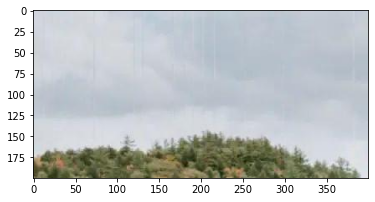

In [15]:
huanyuan_list = huanyuan(json_data['p3'].split('/')[-1].split('.')[0])
response = requests.get(p3_url)
que_img = './dx_img/' + json_data['p3'].split('/')[-1].split('.')[0] + '.jpg'
with open(que_img, 'wb') as f:
    f.write(response.content)
img = Image.open(que_img)
for i in range(32):
    a = 12 * i  # 图片距离左边的大小
    b = 0  # 图片距离上边的大小
    c = 12 * (i + 1)  # 图片距离左边的大小 + 图片自身宽度
    d = 200  # 图片距离上边的大小 + 图片自身高度
    croping = img.crop((a, b, c, d))
    croping.save('./dx_img/ge' + str(i) + '.jpg')

croping = img.crop((384, 0, 400, 200))
croping.save('./dx_img/ge32.jpg')
target = Image.new('RGB', (400, 200))  # 拼接前需要写拼接完成后的图片大小 1200*600
a = 0
c = 0
for i in huanyuan_list:
    pj_img = Image.open('./dx_img/ge'+str(i)+'.jpg')
    a = c  # 图片距离左边的大小
    b = 0  # 图片距离上边的大小
    c = a + 12  # 图片距离左边的大小 + 图片自身宽度
    d = 200  # 图片距离上边的大小 + 图片自身高度
    target.paste(pj_img, (a, b, c, d))
last_img = Image.open('./dx_img/ge32.jpg')
# plt.imshow(last_img)
target.paste(last_img, (384, 0, 400, 200))
# print('拼接图片的路径为：wanzheng.jpg')
target.save('./dx_img/wanzheng.jpg')
wanzheng = Image.open('./dx_img/wanzheng.jpg')
plt.imshow(wanzheng)